# Corporate Bonds ETFs Portfolio

http://www.buschinvestments.com/Types-of-Bonds.c71.htm

 ## Corporate Bonds  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['LQD','VCIT','VCSH','FLOT', 'IGIB']
start = '2012-01-01'
end = '2019-01-01'
title = "Corporate Bonds ETFs"

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  5 of 5 completed


,FLOT,IGIB,LQD,VCIT,VCSH
Date,,,,,
2012-01-03,44.011772,42.293209,85.181641,61.755966,64.183327
2012-01-04,43.984859,42.226177,85.249100,61.598476,64.158577
2012-01-05,44.110458,42.170982,84.881905,61.545948,64.249367
2012-01-06,44.011772,42.245903,85.211617,61.710964,64.315376
2012-01-09,43.868217,42.198574,85.084213,61.815990,64.348389


In [3]:
df.tail()

,FLOT,IGIB,LQD,VCIT,VCSH
Date,,,,,
2018-12-24,48.415710,49.632042,106.937920,78.497650,74.606453
2018-12-26,48.483200,49.555874,106.852036,78.278214,74.558395
2018-12-27,48.541039,49.613003,106.852036,78.516739,74.673714
2018-12-28,48.541039,49.832031,107.357758,78.802933,74.779388
2018-12-31,48.550682,49.917728,107.653564,79.050980,74.885086


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


### Starting Cash with 100k to invest in Bonds

In [5]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
FLOT: 20000.0
IGIB: 20000.0
LQD: 20000.0
VCIT: 20000.0
VCSH: 20000.0


In [6]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
FLOT: 454
IGIB: 472
LQD: 234
VCIT: 323
VCSH: 311


In [7]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
FLOT: $19981.34
IGIB: $19962.39
LQD: $19932.5
VCIT: $19947.18
VCSH: $19961.01


In [8]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
FLOT: $22042.01
IGIB: $23561.17
LQD: $25190.93
VCIT: $25533.47
VCSH: $23289.26


In [9]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $119616.84


In [10]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [11]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

FLOT    0.000056
IGIB    0.000095
LQD     0.000138
VCIT    0.000144
VCSH    0.000088
dtype: float64


In [12]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

FLOT    0.000644
IGIB    0.001579
LQD     0.003103
VCIT    0.002503
VCSH    0.000993
dtype: float64


In [13]:
# Define weights for the portfolio
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [14]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          FLOT      IGIB       LQD      VCIT      VCSH
FLOT  0.000104  0.000007 -0.000013  0.000006  0.000005
IGIB  0.000007  0.000623  0.001011  0.000832  0.000283
LQD  -0.000013  0.001011  0.002407  0.001708  0.000519
VCIT  0.000006  0.000832  0.001708  0.001567  0.000450
VCSH  0.000005  0.000283  0.000519  0.000450  0.000246


In [15]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [16]:
# Print the portfolio return
print(portReturn)

0.00010421818793216508


In [17]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [18]:
returns.head()

,FLOT,IGIB,LQD,VCIT,VCSH,Portfolio
Date,,,,,,
2012-01-04,-0.000611,-0.001585,0.000792,-0.002550,-0.000386,-0.000868
2012-01-05,0.002856,-0.001307,-0.004307,-0.000853,0.001415,-0.000439
2012-01-06,-0.002237,0.001777,0.003884,0.002681,0.001027,0.001426
2012-01-09,-0.003262,-0.001120,-0.001495,0.001702,0.000513,-0.000732
2012-01-10,0.002454,-0.000093,0.002818,0.000728,-0.000256,0.001130


In [19]:
returns.tail()

,FLOT,IGIB,LQD,VCIT,VCSH,Portfolio
Date,,,,,,
2018-12-24,-0.001193,-0.001341,-0.002315,-0.001517,-0.000193,-0.001312
2018-12-26,0.001394,-0.001535,-0.000803,-0.002795,-0.000644,-0.000877
2018-12-27,0.001193,0.001153,0.000000,0.003047,0.001547,0.001388
2018-12-28,0.000000,0.004415,0.004733,0.003645,0.001415,0.002842
2018-12-31,0.000199,0.001720,0.002755,0.003148,0.001413,0.001847


In [20]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                FLOT      IGIB       LQD      VCIT      VCSH  Portfolio
Date                                                                   
2018-12-24  1.100063  1.173523  1.255410  1.271094  1.162396   1.192521
2018-12-26  1.101596  1.171722  1.254402  1.267541  1.161647   1.191475
2018-12-27  1.102910  1.173073  1.254402  1.271403  1.163444   1.193129
2018-12-28  1.102910  1.178251  1.260339  1.276038  1.165091   1.196519
2018-12-31  1.103129  1.180278  1.263812  1.280054  1.166737   1.198729


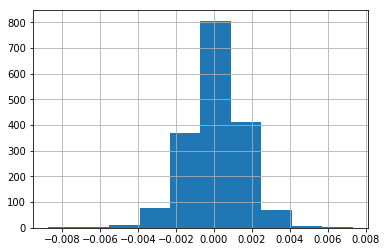

In [21]:
returns['Portfolio'].hist()
plt.show()

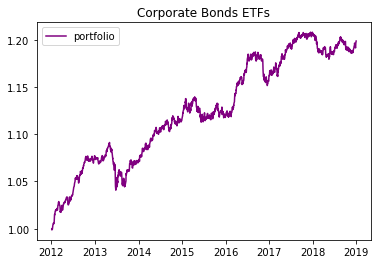

In [22]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.title(title)
plt.legend()
plt.show()

In [23]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.010421818793216513
Std. dev:  0.15264159451535508
skew:  -0.33950040471612913
kurt:  2.4579379805109496


In [24]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

2.41%


In [25]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

0.06%


In [26]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((total_return + 1)**(1/5))-1

In [27]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [28]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

nan


In [29]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.010421818793216513
--------------------------------------------------
Downside risk:
FLOT         0.069584
IGIB         0.122583
LQD          0.233799
VCIT         0.184559
VCSH         0.080775
Portfolio    0.108096
dtype: float64
--------------------------------------------------
Sortino ratio:
FLOT        -14.221265
IGIB         -8.072688
LQD          -4.232594
VCIT         -5.361839
VCSH        -12.251011
Portfolio    -9.154592
dtype: float64


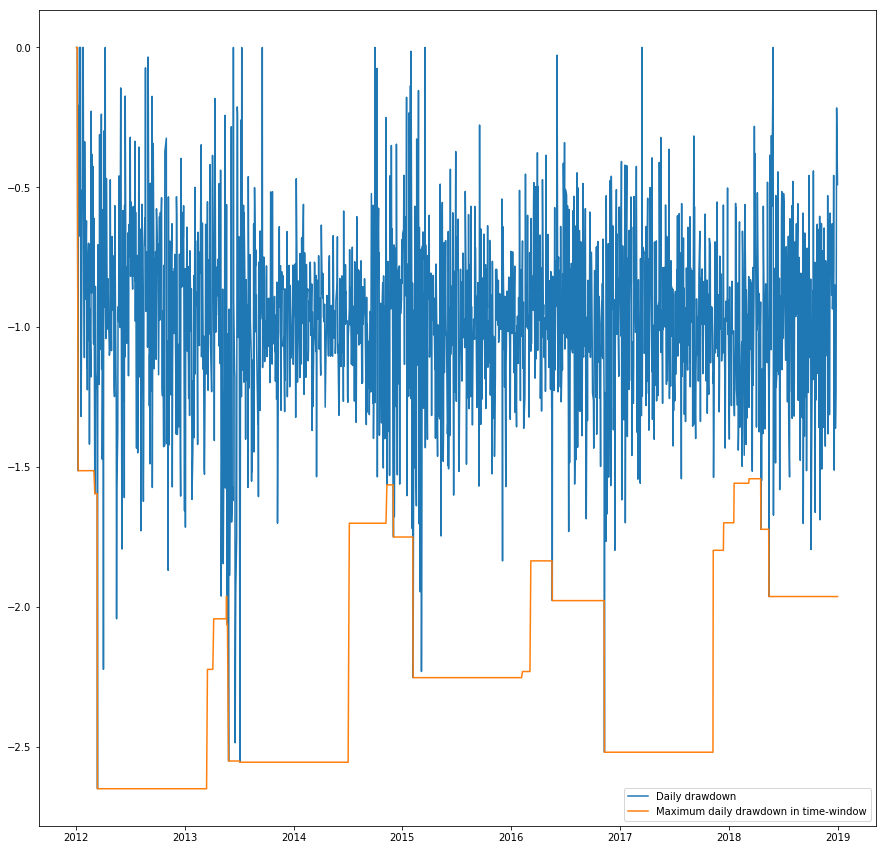

In [30]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

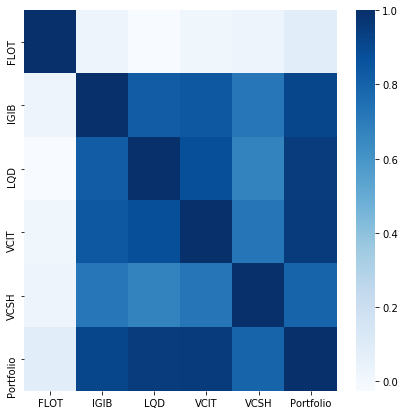

In [31]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

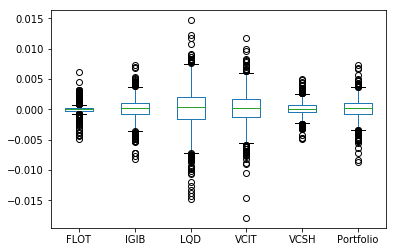

In [32]:
# Box plot
returns.plot(kind='box')

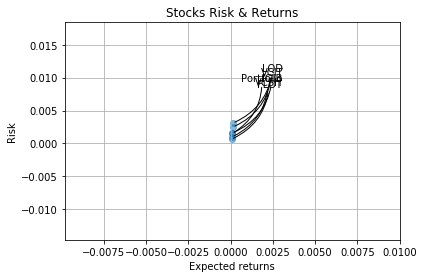

In [33]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

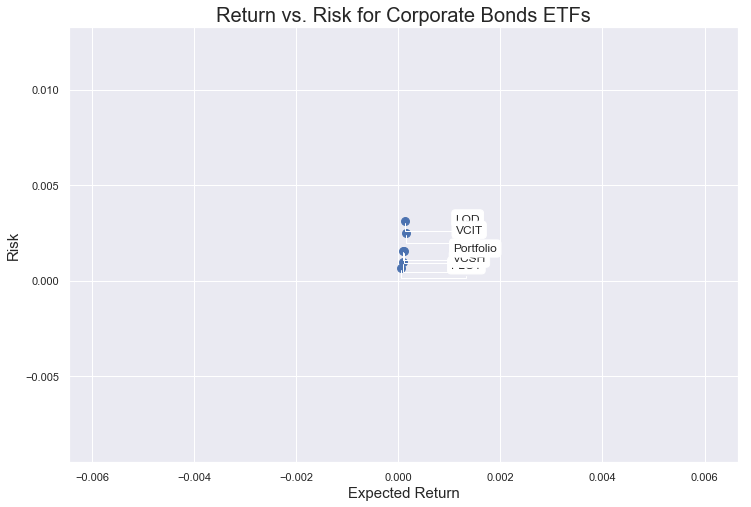

In [34]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for " + title, fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [35]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
FLOT         0.000056
IGIB         0.000095
LQD          0.000138
VCIT         0.000144
VCSH         0.000088
Portfolio    0.000104
dtype: float64
--------------------------------------------------
Stock risk:
FLOT         0.000644
IGIB         0.001579
LQD          0.003103
VCIT         0.002503
VCSH         0.000993
Portfolio    0.001526
dtype: float64


In [36]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
FLOT,0.000056,0.000644
VCSH,0.000088,0.000993
IGIB,0.000095,0.001579
Portfolio,0.000104,0.001526
LQD,0.000138,0.003103
VCIT,0.000144,0.002503


In [37]:
table.sort_values(by='Risk')

,Returns,Risk
FLOT,0.000056,0.000644
VCSH,0.000088,0.000993
Portfolio,0.000104,0.001526
IGIB,0.000095,0.001579
VCIT,0.000144,0.002503
LQD,0.000138,0.003103


In [38]:
table['Sharpe_Ratio'] = (table['Returns'] / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
FLOT,0.000056,0.000644,1.379759
IGIB,0.000095,0.001579,0.960191
LQD,0.000138,0.003103,0.705647
VCIT,0.000144,0.002503,0.910002
VCSH,0.000088,0.000993,1.409709
Portfolio,0.000104,0.001526,1.083854


In [39]:
print('Sortino Ratio:')
for column in rets:
    returns = rets[column]
    numer = pow((1 + returns.mean()), 252) - 1
    annual_volatility = returns.std() * np.sqrt(252)
    denom = annual_volatility

    if denom > 0.0:
         sortino_ratio = numer / denom
    else:
        print('none')
    print(rets[column].name, sortino_ratio)

Sortino Ratio:
FLOT 1.3895030236690635
IGIB 0.9717889224701033
LQD 0.7180036103382496
VCIT 0.9265892010036217
VCSH 1.4254227713351055
Portfolio 1.0981543380109733


In [40]:
print('Kelly Value:')
for column in rets:
    returns = np.array(rets[column])
    wins = returns[returns > 0]
    losses = returns[returns <= 0]
    # W = Winning probability
    # R = Win/loss ratio
    W = len(wins) / len(returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    Kelly = W - ( (1 - W) / R )
    # Kelly value negative means the expected returns will be negative
    # Kelly value positive means the expected returns will be positive
    print(rets[column].name, round(Kelly, 4))

Kelly Value:
FLOT 0.1104
IGIB 0.0794
LQD 0.0591
VCIT 0.075
VCSH 0.107
Portfolio 0.0915
